# Redes Sociales

Una red social es un grafo cuyos vértices representan personas, páginas web u organizaciones y las aristas algún tipo de interacción social. La centralidad de un vértices en una red social está relacionado a la importancia del vértice en el grafo. El grado de un vértice corresponde a la cantidad de aristas incidentes.


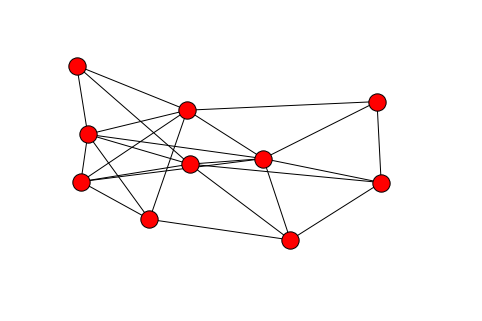

E :  [(0, 9), (0, 3), (0, 4), (0, 6), (0, 7), (1, 4), (1, 6), (1, 7), (2, 9), (2, 5), (2, 6), (3, 8), (3, 6), (3, 7), (4, 5), (4, 7), (4, 8), (4, 9), (5, 8), (5, 9), (6, 7), (6, 9), (7, 9), (8, 9)]
centralidad grado:  {0: 0.5555555555555556, 1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.4444444444444444, 4: 0.6666666666666666, 5: 0.4444444444444444, 6: 0.6666666666666666, 7: 0.6666666666666666, 8: 0.4444444444444444, 9: 0.7777777777777777}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.erdos_renyi_graph(10,0.5)
d=nx.degree(G)
cd=nx.degree_centrality(G)
nx.draw(G)
plt.show()

print 'E : ',G.edges()
print 'centralidad grado: ',cd

In [2]:
cb=nx.betweenness_centrality(G)
cc=nx.load_centrality(G)
print 'E : ',G.edges()
print 'centralidad cercania: ',cb
print 'centralidad intermediacion: ',cc

E :  [(0, 1), (0, 4), (0, 5), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (2, 4), (2, 6), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (4, 7), (5, 9), (6, 9), (6, 7), (7, 8), (7, 9)]
centralidad cercania:  {0: 0.023148148148148143, 1: 0.1608796296296296, 2: 0.0162037037037037, 3: 0.09722222222222221, 4: 0.09374999999999999, 5: 0.023148148148148143, 6: 0.02546296296296296, 7: 0.06828703703703701, 8: 0.0, 9: 0.13078703703703703}
centralidad intermediacion:  {0: 0.023148148148148143, 1: 0.1604938271604938, 2: 0.0162037037037037, 3: 0.09799382716049382, 4: 0.09336419753086417, 5: 0.023148148148148143, 6: 0.026234567901234563, 7: 0.06790123456790123, 8: 0.0, 9: 0.13040123456790126}


# Redes Libres de Escala


1. Las redes libres de escala (scale-free) son redes cuya distribución de grados obedece una ley de potencia
2. Esto significa que unos pocos nodos se encuentran bien conectados y la mayoría se encuentran pobremente conectados.
3. Este tipo de redes se encuentran naturalmente en redes biológicas, citas bibliográficas y la Internet.

In [41]:
import networkx as nx
import matplotlib.pyplot  as plt 

G_fb=nx.read_edgelist('data/facebook_combined.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


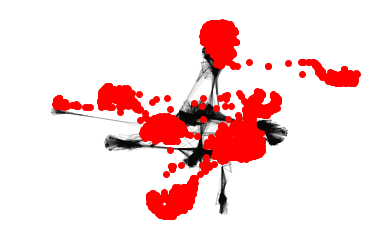

In [42]:
plt.axis("off")
nx.draw_networkx_nodes(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,node_size=35)
nx.draw_networkx_edges(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,alpha=0.1)
plt.show()

In [43]:
cd_fb=nx.degree_centrality(G_fb)
cb_fb=nx.betweenness_centrality(G_fb)

In [9]:
import pandas as pd

def get_node(centrality,func):
    lookup_list = pd.Series(centrality)
    min_val= func(centrality.values())
    return lookup_list[lookup_list.values == min_val]

print get_node(cd_fb,max)
print get_node(cb_fb,max)

107    0.258791
dtype: float64
107    0.480518
dtype: float64


In [10]:
print nx.degree(G_fb,107)

1045


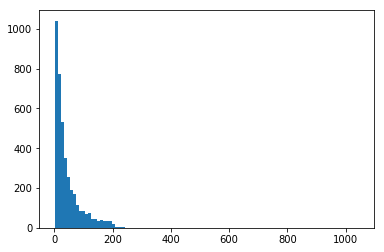

In [31]:
degrees=nx.degree(G_fb)
plt.hist([d for (n,d) in degrees],100)
plt.show()

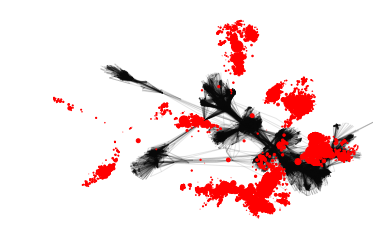

In [45]:
import numpy as np 


nsize=np.array(cd_fb.values())
nsize=1e4*(nsize-min(nsize)/max(nsize)-min(nsize))
plt.axis("off")
nx.draw_networkx_nodes(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,node_size=nsize)
nx.draw_networkx_edges(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,alpha=0.1)
plt.show()

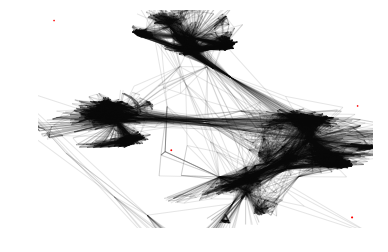

In [47]:
pr_fb=nx.pagerank(G_fb,alpha=0.85)

nsize=np.array(pr_fb.values())
nsize=500*(nsize-min(nsize)/max(nsize)-min(nsize))
plt.axis("off")
nx.draw_networkx_nodes(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,node_size=nsize)
nx.draw_networkx_edges(G_fb,pos=nx.spring_layout(G_fb),with_labels=False,alpha=0.1)
plt.show()